In [1]:
%cd ..
%load_ext autoreload
%autoreload 2


/home/teo/userdata/git_libraries/SejongMusic


Early stopping at 26 onsets
None of the note[1] is matched while note[2]==0: ('-_서침표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_니나', 0.0, 0.0)


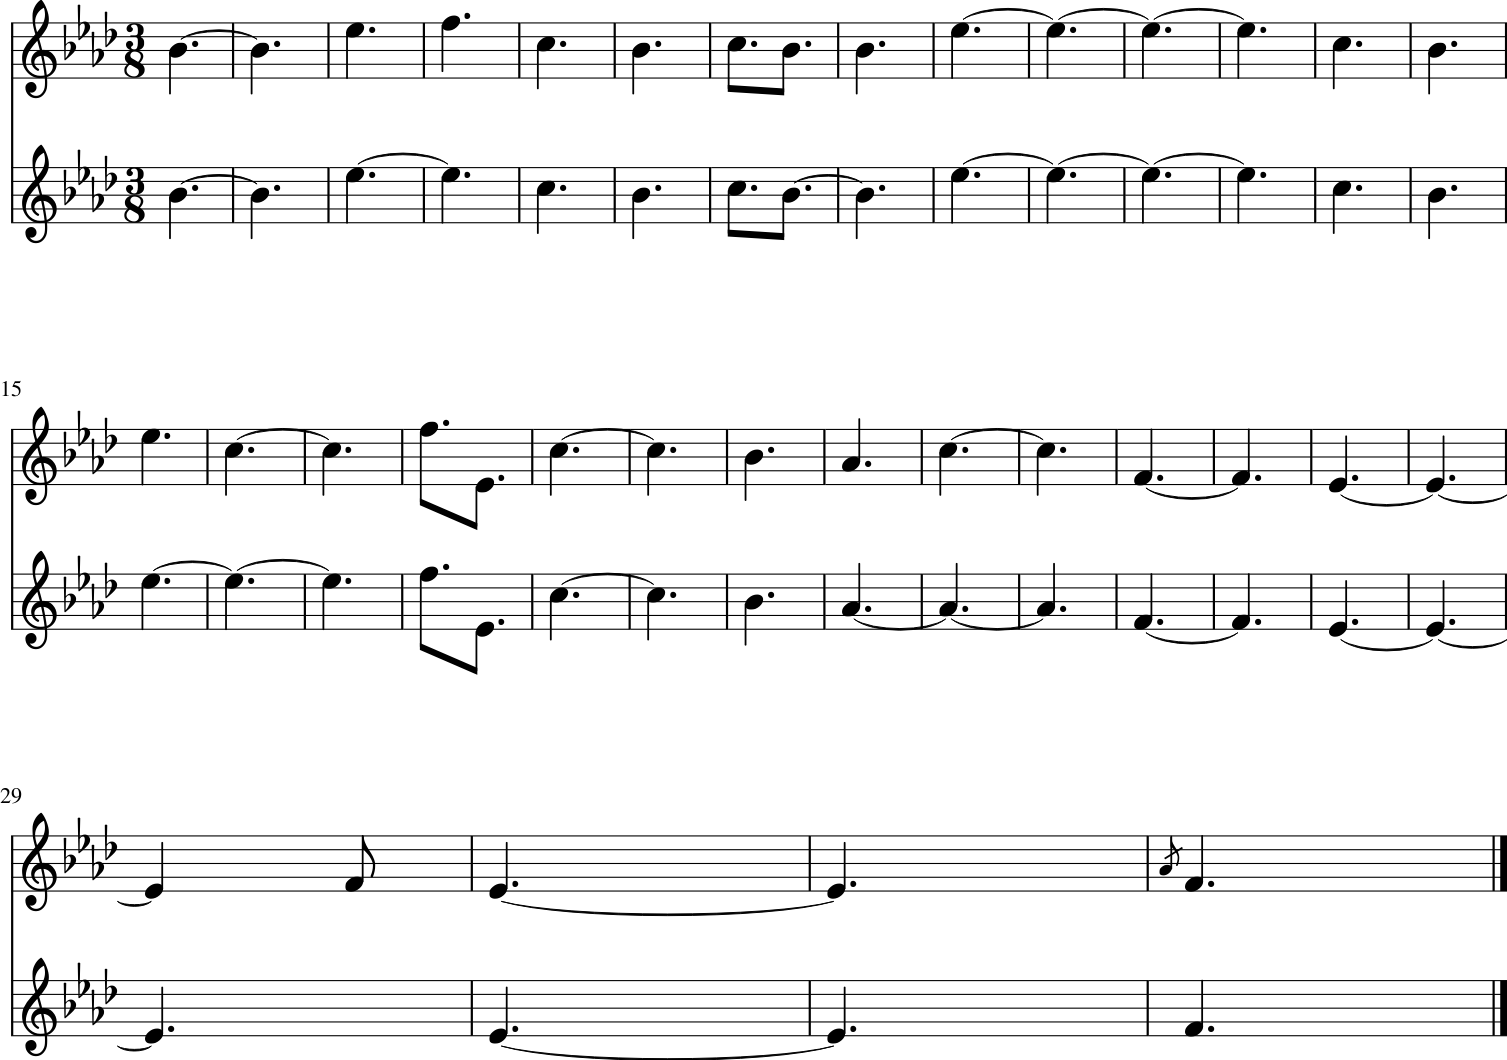

In [2]:
from sejong_music.era_inference import EraTransformer

era_transformer = EraTransformer('models/bert_checkpoints', device='cuda:1')
gen_str = open('music_score/chwipunghyeong_gen.txt').read()
notes_set, score = era_transformer.infer_on_gen_str(gen_str, 'piri', 30, onset_ratio=1.2)
score.show()

In [46]:
from sejong_music.jg_code import JeongganPiece

inst = 'piri'
idx = 0
self = era_transformer
total_gen_str = ''

num_frames_per_measure = 6 * 10
num_use_measure = 2
num_use_frames = num_frames_per_measure * num_use_measure


piece = JeongganPiece(None, gen_str=gen_str, inst_list=[inst])
x = piece.convert_tokens_to_roll(piece.sliced_parts_by_measure[idx][inst], inst)
x = self.convert_to_input_format(x, add_start_end=False)
cond = self.make_dummy_condition_tensor()
x, loss_mask = self.masker.mask_except_note_onset_to_ten(x, cond)
# x, loss_mask = self.aug_form_to_input_form(x), self.aug_form_to_input_form(loss_mask)
x = self.unmask_pitch_and_ornaments(x.to(self.device), loss_mask.to(self.device), 2)

prev_x = x[1+num_frames_per_measure:1+num_use_frames+num_frames_per_measure]
new_x = x[1:1+num_use_frames+num_frames_per_measure]
roll = self.tokenizer.decode(new_x)
omr_str = self.roll2omr(roll)
new_gen_str = self.omr2gen.convert_lines_to_gencode(omr_str.split('\n')) + ' \n '
total_gen_str += new_gen_str


None of the note[1] is matched while note[2]==0.5: ('-_겹흘림표', 0.0, 0.5)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)


In [47]:
from tqdm.auto import tqdm

# total_outs = [prev_x]
# gen_strs = ''
for idx in tqdm(range(1, len(piece.sliced_parts_by_measure))):
# for idx in tqdm(range(1, 10)):
  x = piece.convert_tokens_to_roll(piece.sliced_parts_by_measure[idx][inst], inst)
  x = self.convert_to_input_format(x, add_start_end=False)
  cond = self.make_dummy_condition_tensor()
  x, loss_mask = self.masker.mask_except_note_onset_to_ten(x, cond)
  x[1:1+num_use_frames, :2] = prev_x[:, :2]
  loss_mask[1:1+num_use_frames, :2] = 0
  # x, loss_mask = self.aug_form_to_input_form(x), self.aug_form_to_input_form(loss_mask)
  x = self.unmask_pitch_and_ornaments(x.to(self.device), loss_mask.to(self.device), 2)

  num_use_frames = num_frames_per_measure * num_use_measure
  prev_x = x[1+num_frames_per_measure:1+num_frames_per_measure+num_use_frames]
  if idx == len(piece.sliced_parts_by_measure) - 1:
    new_x = x[1+num_use_frames:-1]
  else:
    new_x = x[1+num_use_frames:1+num_use_frames+num_frames_per_measure]
  # total_outs.append(new_x)
  roll = self.tokenizer.decode(new_x)
  omr_str = self.roll2omr(roll)
  new_gen_str = self.omr2gen.convert_lines_to_gencode(omr_str.split('\n')) + ' \n '
  total_gen_str += new_gen_str
  
total_gen_str

  0%|          | 0/128 [00:00<?, ?it/s]

None of the note[1] is matched while note[2]==1.0: ('-_니레', 0.0, 1.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_루러표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('-_미는표', 0.0, 0.0)
None of the note[1] is matched wh

':0 황 | :8 배남 | :0 태 | :0 황 |  | :0 태 니레 |  | :0 황 니나 | :0 태 |  \n :0 중 | :8 태 | :0 황 | :0 황 |  | :0 황 니나 |  | :0 황 니나 | :0 태 | :8 황 \n :0 황 |  | :0 태 루러표 | :10 황 :11 배남 |  | :0 배임 |  | :0 배임 | :0 배남 | :0 배남 \n :0 배임 | :8 배남 니레 | :0 황 | :0 배남 | :9 니 | :0 배남 |  | :0 배임 | :0 황 |  \n :0 태 | :2 황 :9 니 | :0 배남 | :0 배임 |  | :0 배임 |  | :0 배중 미는표 | :0 배남 |  \n :0 배태 |  | :0 배황 | :0 황 |  | :0 황 니나 |  | :0 배황 니나 | :0 태 | :2 황 :6 태 :8 태 \n :10 황 :11 배남 |  | :0 배임 | :0 황 |  | :0 황 니나 |  | :0 황 니나 | :0 태 |  \n :0 황 |  | :0 배중 | :0 황 |  | :0 황 |  | :0 황 니나 | :0 태 |  \n :0 임 |  | :0 남 | :0 임 |  | :0 임 |  | :0 임 | :0 남 서침표 |  \n :0 임 |  | :0 임 | :0 임 |  | :0 임 |  | :0 임 | :0 남 서침표 |  \n :0 남 |  | :0 청황 | :0 임 |  | :0 임 |  | :0 남 | :0 임 |  \n :0 임 |  | :0 중 | :0 중 |  | :0 중 | :0 남 | :0 임 | :0 남 서침표 | :0 청황 \n :0 남 | :2 임 :8 임 | :2 중 :8 태 | :0 태 |  | :0 태 니레 | :8 중 | :0 황 | :0 황 니나 | :0 태 \n :0 황 | :8 태 | :0 황 | :0 태 | :8 황 | :0 중 |  | :0 태 | :0 황 | :8 태 \n :0 임 |  | :0 남 | :0 임 |  | :0 임 니레 |  | :0 남 |

In [41]:
omr_str = self.roll2omr(roll)


In [48]:
with open('music_score/chwipunghyeong_bert_gen.txt', 'w') as f:
  f.write(total_gen_str)

In [49]:
notes, score = self.gen2staff(total_gen_str, time_signatures='30/8')
score.write('musicxml', 'cph_bert.musicxml')

PosixPath('/home/teo/userdata/git_libraries/SejongMusic/cph_bert.musicxml')

In [42]:
total_tensor = torch.cat(total_outs, dim=0)
roll = self.tokenizer.decode(total_tensor)
omr_str = self.roll2omr(roll)
gen_str = self.omr2gen.convert_lines_to_gencode(omr_str.split('\n')) + ' \n'


In [44]:
roll

[['황', '미는표', 'beat:0', 'jg:0', 'gak:0', 'piri', 'dur:6'],
 ['-', '비어있음', 'beat:1', 'jg:0', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:2', 'jg:0', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:3', 'jg:0', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:4', 'jg:0', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:5', 'jg:0', 'gak:0', 'piri'],
 ['배임', '비어있음', 'beat:0', 'jg:1', 'gak:0', 'piri', 'dur:4'],
 ['-', '비어있음', 'beat:1', 'jg:1', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:2', 'jg:1', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:3', 'jg:1', 'gak:0', 'piri'],
 ['배남', '비어있음', 'beat:4', 'jg:1', 'gak:0', 'piri', 'dur:2'],
 ['-', '비어있음', 'beat:5', 'jg:1', 'gak:0', 'piri'],
 ['태', '비어있음', 'beat:0', 'jg:2', 'gak:0', 'piri', 'dur:10'],
 ['-', '비어있음', 'beat:1', 'jg:2', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:2', 'jg:2', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:3', 'jg:2', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:4', 'jg:2', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:5', 'jg:2', 'gak:0', 'piri'],
 ['-', '비어있음', 'beat:0', 'jg:3', 'gak:0', 'p

In [21]:
import torch
from sejong_music.jg_to_staff_converter import JGToStaffConverter
from sejong_music.era_align_utils import EraAlignPairSet

tokens = piece.sliced_parts_by_measure[idx][inst]
new_notes = era_transformer.masker.predict_alignment(tokens, era_idx=1, threshold=0.3)
new_notes
# notes = JGToStaffConverter.convert_to_notes(tokens)
# JGToStaffConverter.get_duration_of_notes(notes)
# JGToStaffConverter().create_m21_notes(notes)

# features = []
# for note in notes:
#   note_feature = ['era1', f'pitch{note.midi_pitch}', EraAlignPairSet.convert_duration(note.duration/2), 'strong']
#   features.append(note_feature)

# masker_input = torch.LongTensor(era_transformer.masker.tokenizer(features))
# era_transformer.masker.align_model(masker_input.unsqueeze(0)).squeeze()

[Note 황(63)_ :0 @ 0+0 / 2,
 Note 태(65)_ :0 @ 2+0 / 3,
 Note 황(63)_ :0 @ 5+0 / 5,
 Note 황(63)_ :0 @ 10+0 / 6,
 Note 황(63)_ :0 @ 16+0 / 2,
 Note 태(65)_ :0 @ 18+0 / 1,
 Note 배남(60)_ :11 @ 19+1/2 / 3/2,
 Note 배임(58)_ :0 @ 21+0 / 2,
 Note 배남(60)_ :0 @ 23+0 / 1,
 Note 황(63)_ :0 @ 26+0 / 2,
 Note 배임(58)_ :0 @ 29+0 / 1,
 Note 황(63)_ :0 @ 30+0 / 2]

In [16]:
notes[3].jg_offset + notes[3].beat_offset

2

In [17]:
era_transformer.masker.tokenizer.vocab

['pad',
 'start',
 'end',
 'era1',
 'era2',
 'era3',
 'era4',
 'era5',
 'era6',
 'long',
 'middle',
 'pitch0',
 'pitch46',
 'pitch51',
 'pitch53',
 'pitch55',
 'pitch56',
 'pitch58',
 'pitch60',
 'pitch61',
 'pitch63',
 'pitch65',
 'pitch67',
 'pitch68',
 'pitch70',
 'pitch72',
 'pitch75',
 'short',
 'strong',
 'verylong',
 'veryshort',
 'weak']

In [ ]:
new_vocab = []
for word in era_transformer.masker.tokenizer.vocab:
  if 'pitch' not in word:
    new_vocab.append(word)
  elif word == 'pitch0':
    new_vocab.append(word)
  else:
    new_vocab.append(f'pitch{int(word[5:])+12}')
new_vocab

In [ ]:
idx=0
inst = 'piri'
self = era_transformer

piece = JeongganPiece(None, gen_str=gen_str, inst_list=[inst])
x = piece.convert_tokens_to_roll(piece.sliced_parts_by_measure[idx][inst], inst)
x = self.convert_to_input_format(x)
x, loss_mask = self.masker.mask_except_note_onset(x)
x, loss_mask = self.aug_form_to_input_form(x), self.aug_form_to_input_form(loss_mask)
x = self.unmask_pitch_and_ornaments(x.to(self.device), loss_mask.to(self.device), 3)


In [ ]:
roll = self.tokenizer.decode(x)
roll

In [ ]:
import argparse
import datetime
import copy
from pathlib import Path
from omegaconf import OmegaConf
from fractions import Fraction
from tqdm.auto import tqdm

import torch
from music21 import converter, stream, note as m21_note 
import numpy as np

from sejong_music import model_zoo, jg_code, inference
from sejong_music.yeominrak_processing import OrchestraScoreSeq, ShiftedAlignedScore, Tokenizer
from sejong_music.model_zoo import JeongganTransSeq2seq, JeongganBERT
from sejong_music.decode import MidiDecoder, OrchestraDecoder
from sejong_music.inference_utils import prepare_input_for_next_part, get_measure_specific_output, fix_measure_idx, fill_in_source, get_measure_shifted_output, recover_beat, round_number
from sejong_music.inference import JGInferencer
from sejong_music.jg_to_staff_converter import JGToStaffConverter
from sejong_music.jg_code import JeongganDataset, JeongganTokenizer, JGMaskedDataset, JeongganPiece
from sejong_music.full_inference import Generator

In [ ]:
state_dir = Path('wandb/run-20240405_155230-52nfcuf5/files/checkpoints')
config_fn = state_dir / 'config.yaml'
json_fn = state_dir / 'tokenizer_vocab.json'
ckpt_fn = state_dir / 'inst_0' / 'iter46400_model.pt'

assert config_fn.exists() and json_fn.exists() and ckpt_fn.exists()

config = OmegaConf.load(config_fn)
tokenizer = JeongganTokenizer(None, None, True, json_fn=json_fn)
model = JeongganBERT(tokenizer=tokenizer, config=config.model)
model.load_state_dict(torch.load(ckpt_fn, map_location='cpu'))
dataset = JGMaskedDataset(is_valid=True, tokenizer=tokenizer, augment_param=config.aug)
augmentor = dataset.augmentor

In [ ]:
def convert_to_input_format(roll_array:np.ndarray):
  assert roll_array.ndim == 2
  roll_list = roll_array.tolist()
  roll_list = [ ['start'] * len(roll_list[0])] + roll_list + [ ['end'] * len(roll_list[0])]
  tokens = tokenizer(roll_list)
  return torch.LongTensor(tokens)

def aug_form_to_input_form(x:torch.Tensor):
  assert x.ndim == 3
  return x.permute(2,0,1).flatten(0,1)

x = dataset.entire_segments[0]['daegeum']
x = convert_to_input_format(x)
x, loss_mask = augmentor.mask_except_start_beat(x)
x, loss_mask = aug_form_to_input_form(x), aug_form_to_input_form(loss_mask)

In [ ]:
gen_str = open('music_score/chwipunghyeong_gen.txt').read()
piece = JeongganPiece(None, gen_str=gen_str, inst_list=['piri'])

x = piece.convert_tokens_to_roll(piece.sliced_parts_by_measure[30]['piri'], 'piri')
x = convert_to_input_format(x)
# x, loss_mask = augmentor.mask_except_start_beat(x)
x, loss_mask = augmentor.mask_except_note_onset(x)
x, loss_mask = aug_form_to_input_form(x), aug_form_to_input_form(loss_mask)

x = bert_inference(model, x, loss_mask, 3)

In [ ]:
import matplotlib.pyplot as plt
from  torch.nn.functional import one_hot

plt.imshow(one_hot(x[:, 0]).T, aspect='auto', interpolation='nearest')

In [ ]:
def bert_inference(model, x, loss_mask, n):
  with torch.inference_mode():
    pitch_mask_remaining = loss_mask[:,0].sum()
    while pitch_mask_remaining >0:
      pred, _ = model(x.unsqueeze(0))
      pred = pred[0] # (T, C)
      pitch_pred = pred[:, 0]
      pitch_mask = loss_mask[:, 0]

      is_masked = pitch_mask==1
      pitch_masked_idx = torch.where(is_masked)[0]
      
      masked_pitch_prob = pitch_pred[is_masked].softmax(dim=-1)
      high_prob_idx = masked_pitch_prob.max(dim=-1).values.argsort(descending=True)[:n]
      high_prob_pitches = masked_pitch_prob[high_prob_idx].argmax(dim=-1)
      
      selected_idx = pitch_masked_idx[high_prob_idx]
      x[selected_idx, 0] = high_prob_pitches 
      loss_mask[selected_idx, 0] = 0
      pitch_mask_remaining = loss_mask[:,0].sum()
    
    orn_mask_remaining = loss_mask[:,1].sum()  
    while orn_mask_remaining >0:
      pred, _ = model(x.unsqueeze(0))
      pred = pred[0] # (T, C)
      orn_pred = pred[:, 1]
      orn_mask = loss_mask[:, 1]

      is_masked = orn_mask==1
      orn_masked_idx = torch.where(is_masked)[0]
      
      masked_orn_prob = orn_pred[is_masked].softmax(dim=-1)
      high_prob_idx = masked_orn_prob.max(dim=-1).values.argsort(descending=True)[:n]
      high_prob_orns = masked_orn_prob[high_prob_idx].argmax(dim=-1)
      
      selected_idx = orn_masked_idx[high_prob_idx]
      x[selected_idx, 1] = high_prob_orns 
      loss_mask[selected_idx, 1] = 0
      orn_mask_remaining = loss_mask[:,1].sum()
  return x

In [ ]:
n = 3
pitch_mask_remaining = loss_mask[:,0].sum()
while pitch_mask_remaining >0:
  pred, _ = model(x.unsqueeze(0))
  pred = pred[0] # (T, C)
  pitch_pred = pred[:, 0]
  pitch_mask = loss_mask[:, 0]

  is_masked = pitch_mask==1
  pitch_masked_idx = torch.where(is_masked)[0]
  
  masked_pitch_prob = pitch_pred[is_masked].softmax(dim=-1).detach()
  high_prob_idx = masked_pitch_prob.max(dim=-1).values.argsort(descending=True)[:n]
  high_prob_pitches = masked_pitch_prob[high_prob_idx].argmax(dim=-1)
  
  selected_idx = pitch_masked_idx[high_prob_idx]
  x[selected_idx, 0] = high_prob_pitches 
  loss_mask[selected_idx, 0] = 0
  pitch_mask_remaining = loss_mask[:,0].sum()

orn_mask_remaining = loss_mask[:,1].sum()  
while orn_mask_remaining >0:
  pred, _ = model(x.unsqueeze(0))
  pred = pred[0] # (T, C)
  orn_pred = pred[:, 1]
  orn_mask = loss_mask[:, 1]

  is_masked = orn_mask==1
  orn_masked_idx = torch.where(is_masked)[0]
  
  masked_orn_prob = orn_pred[is_masked].softmax(dim=-1).detach()
  high_prob_idx = masked_orn_prob.max(dim=-1).values.argsort(descending=True)[:n]
  high_prob_orns = masked_orn_prob[high_prob_idx].argmax(dim=-1)
  
  selected_idx = orn_masked_idx[high_prob_idx]
  x[selected_idx, 1] = high_prob_orns 
  loss_mask[selected_idx, 1] = 0
  orn_mask_remaining = loss_mask[:,1].sum()

In [ ]:
import music21
import copy
from typing import List
from sejong_music.jeonggan_utils import JGConverter, GencodeConverter, RollToJGConverter
from sejong_music.jg_to_staff_converter import JGToStaffConverter


roll = tokenizer.decode(x)

converter = RollToJGConverter()
jg_omr_str = converter(roll)
gen_str = GencodeConverter.convert_lines_to_gencode(jg_omr_str.split('\n'))
staff_converter = JGToStaffConverter()
mnotes, score = staff_converter(gen_str)

org_token = piece.sliced_parts_by_measure[30]['piri']
org_nots, org_score = staff_converter(org_token)

total_score = music21.stream.Score()
total_score.insert(0, score)
total_score.insert(0, org_score)
total_score.show()

In [ ]:
roll

In [ ]:
mnotes

In [ ]:
jg_omr_str

In [ ]:
roll

In [ ]:
from sejong_music.jg_code import JeongganPiece

JeongganPiece('music_score/chwipunghyeong.txt')

In [ ]:
with open('music_score/chwipunghyeong.txt') as f:
  jg_omr_str = f.read()
# jg_omr_str.split('\n')
gen_str =GencodeConverter.convert_lines_to_gencode(jg_omr_str.split('\n'))
gen_str

In [ ]:
pitch_mapping = {'배대':'배황', '배협':'배태', '배유':'배중', '배이':'배임', '배무':'배남',
'대':'황', '협':'태', '유':'중', '이':'임', '무':'남', '청대':'청황', '청협':'청태'}

outputs = []
for token in gen_str.split(' '):
  if token in pitch_mapping:
    outputs.append(pitch_mapping[token])
  else:
    outputs.append(token)
outputs = ' '.join(outputs)

with open('music_score/chwipunghyeong_gen.txt', 'w') as f:
  f.write(outputs)

In [ ]:
score.show()

In [ ]:
org_token = dataset.all_pieces[0].sliced_parts_by_measure[0]['daegeum']
org_notes, org_score = staff_converter(org_token)

In [ ]:
import music21
total_score = music21.stream.Score()

total_score.insert(0, score)
total_score.insert(0, org_score)
total_score.show()

In [ ]:
masked_pitch_prob.max(dim=-1).values.argsort(descending=True)

In [ ]:
plt.imshow(masked_pitch_prob.detach().cpu().numpy().T, aspect='auto')

In [ ]:
pred.squeeze().shape, (loss_mask==1).shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss_mask.shape

In [ ]:
pred.squeeze()[loss_mask==1].shape

In [ ]:
masked_token_prob = pred.squeeze()[loss_mask==1].softmax(dim=-1).detach()
masked_token_prob.shape

In [ ]:
plt.imshow(pred.squeeze()[loss_mask==1].softmax(dim=-1).detach().T)

In [24]:
from sejong_music.jg_code import JeongganPiece, JeongganDataset

dataset = JeongganDataset(is_valid=True)
dataset.tokenizer.decode(dataset[0][0])
# len(dataset[0][0])

[['start', 'start', 'start', 'start', 'daegeum'],
 [':1', 'prev|', 'jg:0', 'gak:0', 'piri'],
 ['배남', 'prev:1', 'jg:0', 'gak:0', 'piri'],
 [':3', 'prev:1', 'jg:0', 'gak:0', 'piri'],
 ['태', 'prev:3', 'jg:0', 'gak:0', 'piri'],
 ['|', 'prev:3', 'jg:0', 'gak:0', 'piri'],
 ['|', 'prev|', 'jg:1', 'gak:0', 'piri'],
 [':9', 'prev|', 'jg:2', 'gak:0', 'piri'],
 ['노', 'prev:9', 'jg:2', 'gak:0', 'piri'],
 ['|', 'prev:9', 'jg:2', 'gak:0', 'piri'],
 [':0', 'prev|', 'jg:3', 'gak:0', 'piri'],
 ['중', 'prev:0', 'jg:3', 'gak:0', 'piri'],
 ['|', 'prev:0', 'jg:3', 'gak:0', 'piri'],
 [':8', 'prev|', 'jg:4', 'gak:0', 'piri'],
 ['쉼표', 'prev:8', 'jg:4', 'gak:0', 'piri'],
 ['\n', 'prev:8', 'jg:4', 'gak:0', 'piri'],
 [':1', 'prev\n', 'jg:0', 'gak:1', 'piri'],
 ['임', 'prev:1', 'jg:0', 'gak:1', 'piri'],
 [':3', 'prev:1', 'jg:0', 'gak:1', 'piri'],
 ['청황', 'prev:3', 'jg:0', 'gak:1', 'piri'],
 [':8', 'prev:3', 'jg:0', 'gak:1', 'piri'],
 ['남', 'prev:8', 'jg:0', 'gak:1', 'piri'],
 ['노네', 'prev:8', 'jg:0', 'gak:1', 'piri

In [23]:
import torch
from sejong_music.utils import pad_collate_transformer

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=pad_collate_transformer)
next(iter(dataloader))[0].shape

torch.Size([32, 1013, 5])

In [5]:
gen_str = open('music_score/chwipunghyeong_gen.txt').read()

from sejong_music.jg_code import JeongganPiece
JeongganPiece(None, gen_str=gen_str, inst_list=['piri']).sliced_parts_by_measure[0]['piri']

JeongganDataset()

[':0',
 '황',
 '|',
 '|',
 ':0',
 '태',
 '|',
 '|',
 '|',
 ':0',
 '황',
 '|',
 '|',
 '\n',
 '|',
 '|',
 ':0',
 '황',
 '|',
 '|',
 '|',
 '|',
 '|',
 '\n',
 ':0',
 '황',
 '|',
 '|',
 ':0',
 '태',
 '|',
 ':10',
 '황',
 ':11',
 '배남',
 '|',
 '|',
 ':0',
 '배임',
 '|',
 '|',
 ':0',
 '배남',
 '\n',
 ':0',
 '배임',
 '|',
 '|',
 ':0',
 '황',
 '|',
 '|',
 ':0',
 '배남',
 '|',
 ':0',
 '배임',
 '|',
 ':0',
 '황',
 '|',
 '\n']